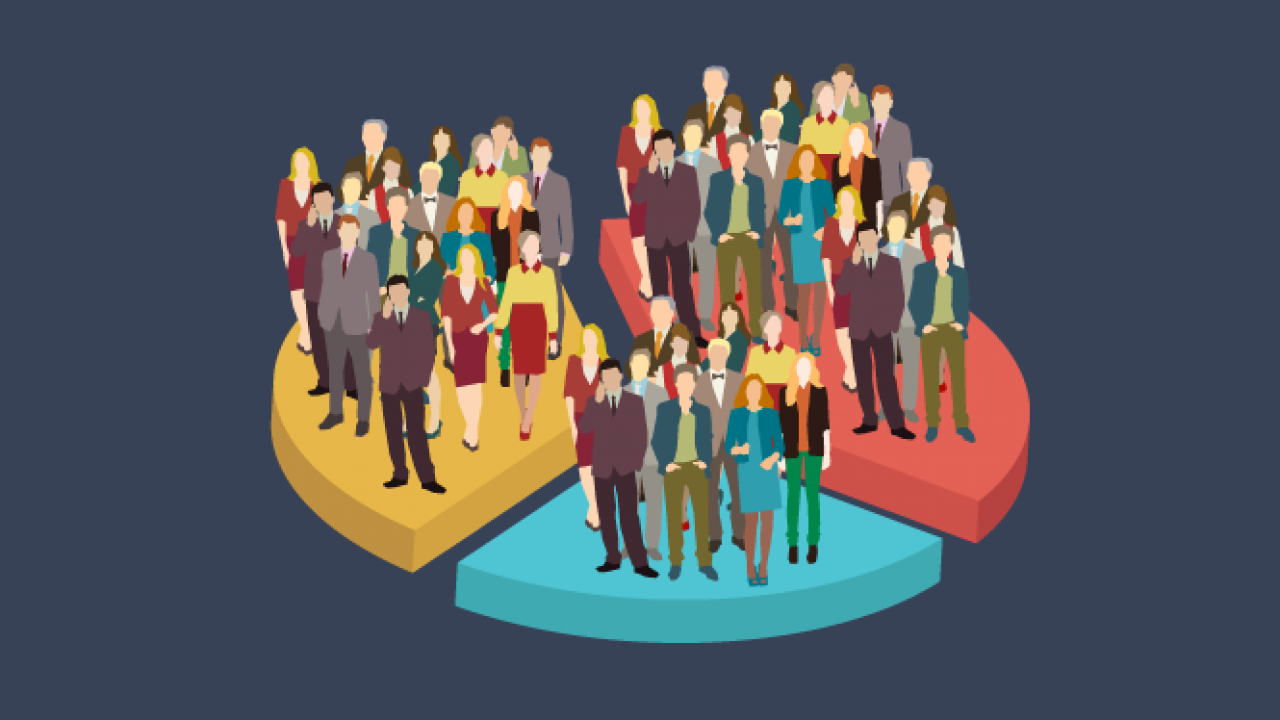

<div>
</div>
<div style="font-family: 'Playfair Display', serif;  letter-spacing: 0px; color:#1A132F; font-size:120%; padding:10px; background: #408E91; border-radius: 6px;">
    <h3 style="color: #1A132F;font-weight:bold">Clustering</h3>
    <p style="font-size: 110%;color: black;">
        Clustering is an unsupervised machine learning technique that groups similar data points together.</p>
    <h3 style="color: #1A132F;font-weight:bold">used for</h3>
    <p style="font-size: 110%;color: black;">discovering patterns, reducing data complexity, and improving decision-making not for prediction.</p>
</div>


# <div style="font-family: 'Playfair Display', serif; font-weight:bold; letter-spacing: 0px; color:#1A132F; font-size:120%; text-align:center; padding:10px; background: #C6DCE4; border-radius: 25px; box-shadow: 10px 10px 5px #748DA6;" > 1. Import libiraries</div>  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid')
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')


# <div style="font-family: 'Playfair Display', serif; font-weight:bold; letter-spacing: 0px; color:#1A132F; font-size:120%; text-align:center; padding:10px; background: #C6DCE4; border-radius: 25px; box-shadow: 10px 10px 5px #748DA6;" > 2. Understanding the data</div>  

In [2]:
data=pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [4]:
data.shape

(200, 5)

the data is small

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


 <div style="font-family: 'Playfair Display', serif; font-weight:bold; letter-spacing: 0px; color:#1A132F; font-size:120%; padding:10px; background: #408E91; border-radius: 5px;" > no null values our data is clear.
    </div>  

In [6]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
data.describe(include='object')

,Gender
count,200
unique,2
top,Female
freq,112


In [8]:
numerical_col=data.select_dtypes(include=np.number).columns.to_list()

 <div style="font-family: 'Playfair Display', serif; font-weight:bold; letter-spacing: 0px; color:#1A132F; font-size:120%; padding:10px; background: #408E91; border-radius: 6px;" > Droping ID column.
    </div>  

In [9]:
data.drop(['CustomerID'],axis=1,inplace=True)
numerical_col.remove('CustomerID')

# <div style="font-family: 'Playfair Display', serif; font-weight:bold; letter-spacing: 0px; color:#1A132F; font-size:120%; text-align:center; padding:10px; background: #C6DCE4; border-radius: 25px; box-shadow: 10px 10px 5px #748DA6;" > 3. Data visualization</div>  

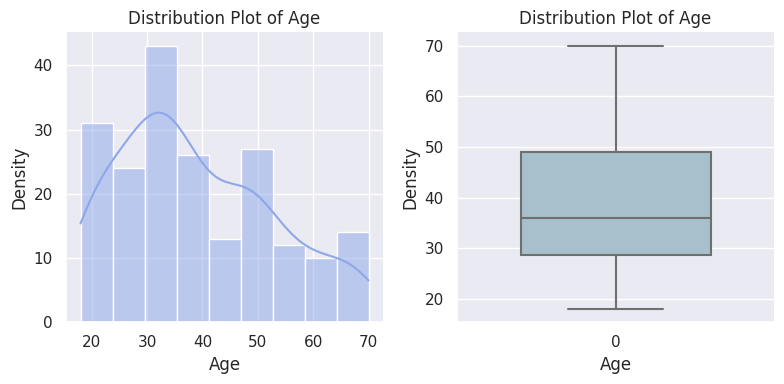

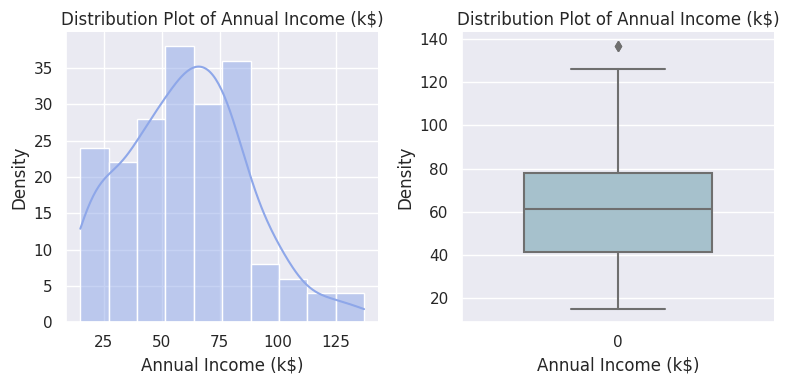

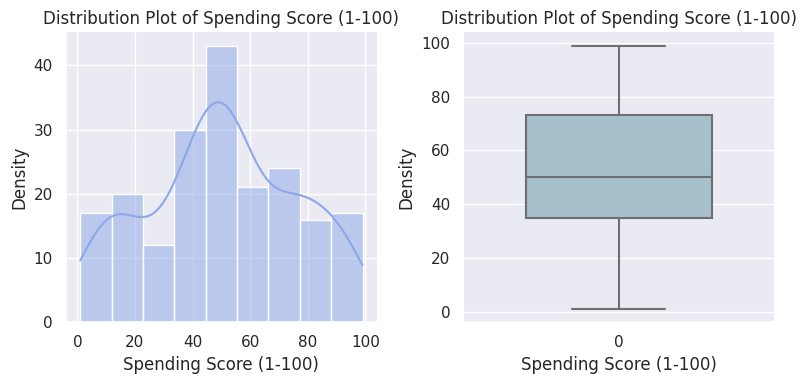

In [10]:
for i in range(len(numerical_col)):
    plt.figure(figsize=(8,4))
    plt.subplot(1, 2, 1)
    sns.histplot(data[numerical_col[i]],kde=True,color='#8EA7E9')
    plt.xlabel(numerical_col[i])
    plt.ylabel('Density')
    plt.title(f'Distribution Plot of {numerical_col[i]}')
    sns.despine()
    plt.subplot(1, 2, 2)
    sns.boxplot(data[numerical_col[i]],color='#A0C3D2',width=0.6, fliersize=5)
    plt.xlabel(numerical_col[i])
    plt.ylabel('Density')
    plt.title(f'Distribution Plot of {numerical_col[i]}')
    sns.despine()
    plt.tight_layout()
plt.tight_layout()
plt.show()

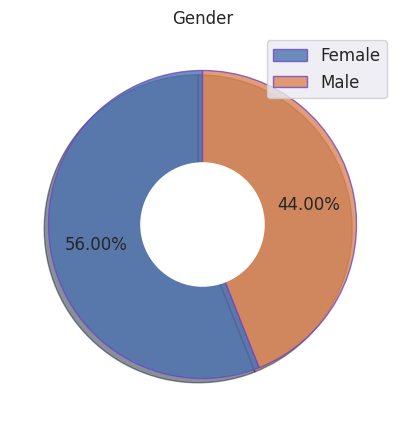

In [11]:
plt.figure(figsize=(6, 5))
plt.pie(data['Gender'].value_counts(), startangle=90,shadow=True,pctdistance=0.7,autopct='%.2f%%', wedgeprops=dict(alpha=0.8, edgecolor='#6C48C5'),textprops={'fontsize':12})
centre_circle = plt.Circle((0,0), 0.40, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Gender')
plt.legend(['Female', 'Male'], loc='best', fontsize=12)
plt.show()

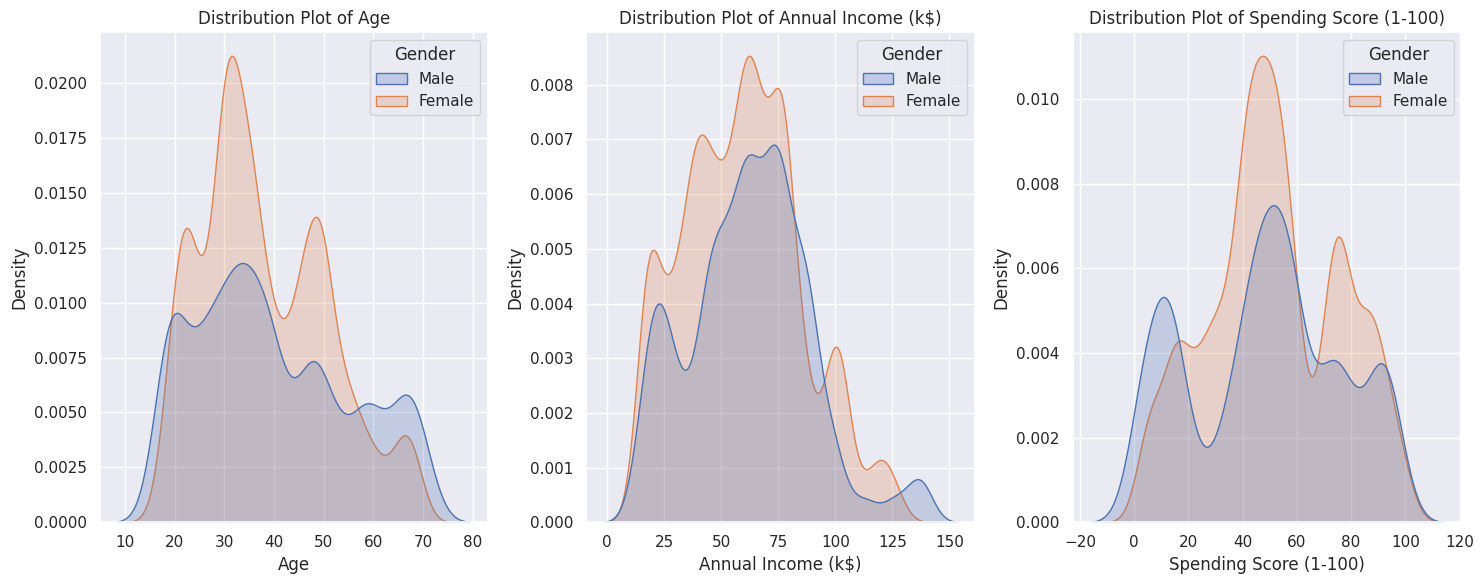

In [12]:
plt.figure(figsize=(15, 6))
for i,col in enumerate(numerical_col):
    plt.subplot(1,3,i+1)
    sns.kdeplot(x=data[col], hue=data['Gender'], shade=True, bw_adjust=.5)
    plt.title(f'Distribution Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.tight_layout()
plt.show()

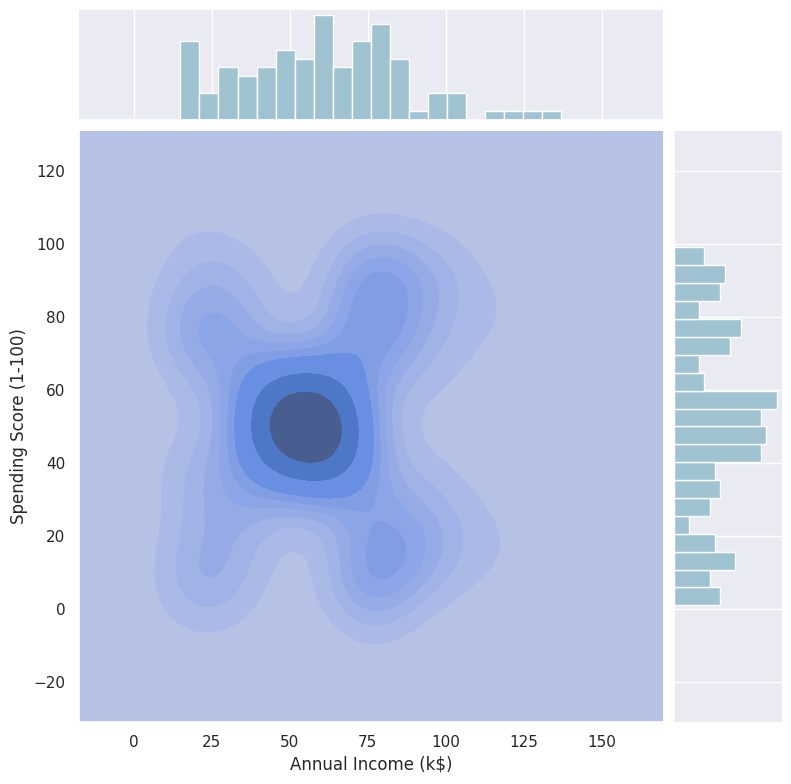

In [13]:
shap = sns.JointGrid(data = data, height = 8, x = "Annual Income (k$)", y = "Spending Score (1-100)", space = 0.1)
shap.plot_joint(sns.kdeplot, fill = True, thresh = 0, color = '#8EA7E9')
shap.plot_marginals(sns.histplot, color = '#A0C3D2', alpha = 1, bins = 20);

This type of plot allows you to see both the relationship between Annual Income and Spending Score and their individual distributions in a visually clear way.

<Figure size 1000x600 with 0 Axes>

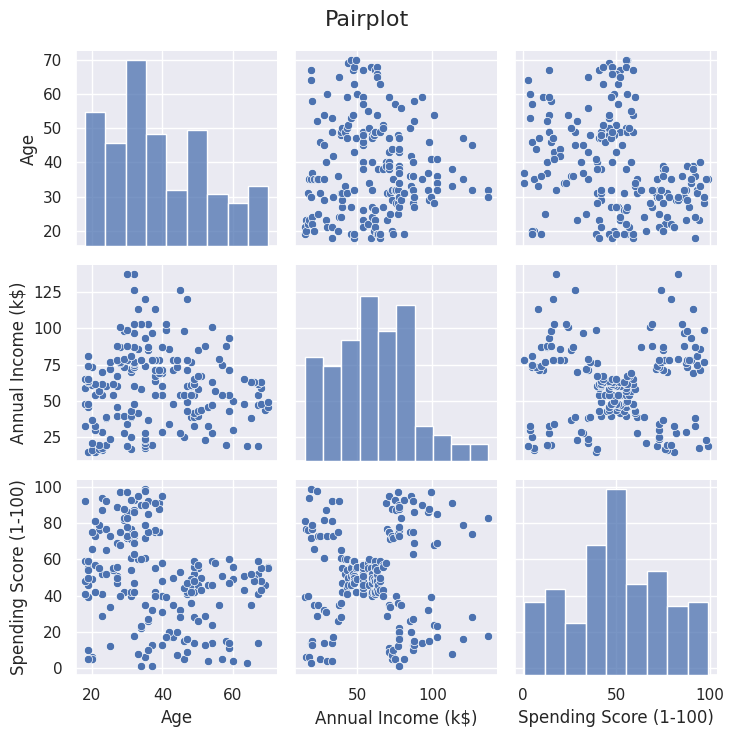

In [14]:
plt.figure(figsize=(10, 6))
sns.pairplot(data,  palette='Set1')
plt.suptitle('Pairplot', fontsize=16)
plt.tight_layout()
plt.show()

<Axes: >

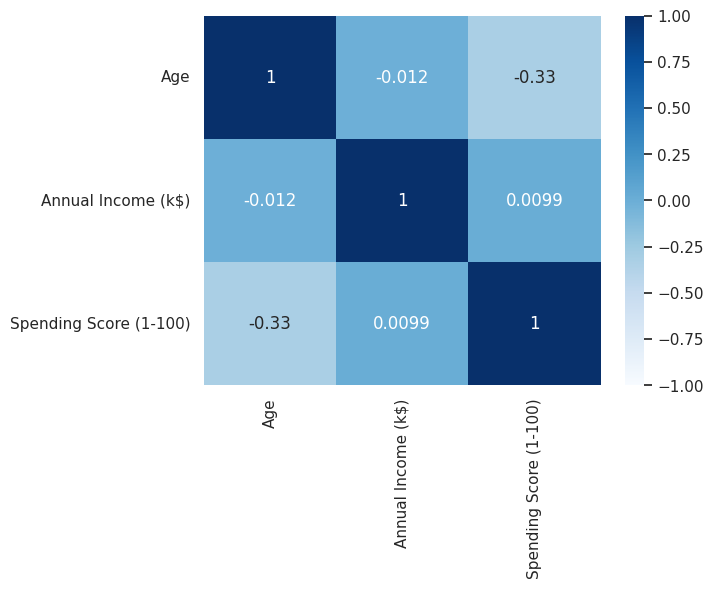

In [15]:
sns.heatmap(data[numerical_col].corr(),vmin=-1, vmax=1, annot=True,cmap='Blues')

# <div style="font-family: 'Playfair Display', serif; font-weight:bold; letter-spacing: 0px; color:#1A132F; font-size:120%; text-align:center; padding:10px; background: #C6DCE4; border-radius: 25px; box-shadow: 10px 10px 5px #748DA6;" > 4. Data prepocessing</div>  

In [16]:
data['Gender']=LabelEncoder().fit_transform(data['Gender'])
data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


# <div style="font-family: 'Playfair Display', serif; font-weight:bold; letter-spacing: 0px; color:#1A132F; font-size:120%; text-align:center; padding:10px; background: #CDDCEC; border-radius: 0px; box-shadow: 10px 10px 5px #748DAB;" > Clustering - kmeans </div>  

## <div style="font-family: 'Playfair Display', serif; font-weight:bold; letter-spacing: 0px; color:#1A132F; font-size:120%; text-align:center; padding:10px; background: #C6DCE4; border-radius: 25px; box-shadow: 10px 10px 5px #748DA6;" > 5.1 clustering 4 variables</div>  

In [17]:
x_2D=data.iloc[:,:]

In [18]:
sc = StandardScaler()
x_2D = sc.fit_transform(x_2D)

<div style="font-family: 'Playfair Display', serif; font-weight:bold; letter-spacing: 0px; color:#1A132F; font-size:120%; padding:10px; background: #408E91; border-radius: 6px;">
    <p style="font-size: 110%;color: black;">Using PCA before visualizing clusters is helpful when you're working with higher-dimensional data, like data with 4 or more features, for the following reasons:<br>
1- If your dataset has more than two features, visualizing it directly on a 2D plot isn't possible. PCA reduces the dimensionality of the data.<br>
2- PCA helps retain the most important aspects of the data. Even after reducing the data from 4D to 2D.<br>
3- helping to remove noise and make the clusters clearer.<br></p>
</div>


In [19]:
pca = PCA(n_components=2)
x_2D = pca.fit_transform(x_2D)

 <div style="font-family: 'Playfair Display', serif; font-weight:bold; letter-spacing: 0px; color:#1A132F; font-size:120%; padding:10px; background: #408E91; border-radius: 6px;" >choosing the number of clusters<br>
    </div>  

In [20]:
silhouette_scores = []
wcss=[]
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(x_2D)
  wcss.append(kmeans.inertia_)
  if i > 1:
        score = silhouette_score(x_2D, kmeans.labels_)
        silhouette_scores.append(score)


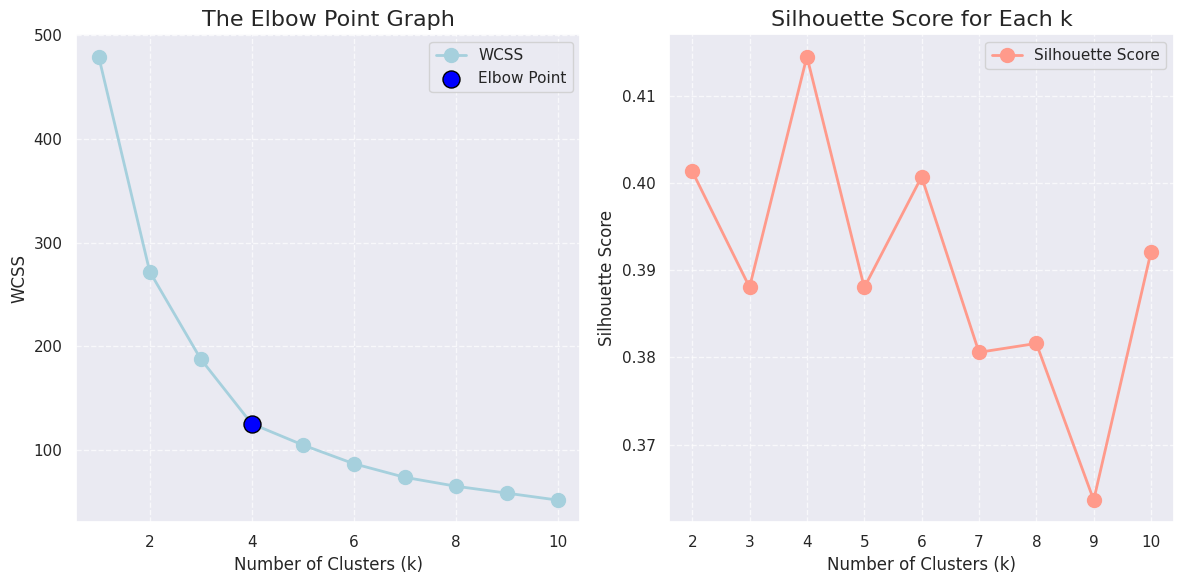

In [21]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='#A6D0DD',
         markersize=10, linewidth=2, label='WCSS')
plt.title('The Elbow Point Graph', fontsize=16)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('WCSS', fontsize=12)

elbow_point = 4
plt.scatter(elbow_point, wcss[elbow_point-1], color='blue', s=150, zorder=5, edgecolor='black', label='Elbow Point')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='-', color='#FF9A8B',
         markersize=10, linewidth=2, label='Silhouette Score')
plt.title('Silhouette Score for Each k', fontsize=16)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

plt.tight_layout()
plt.show()

 <div style="font-family: 'Playfair Display', serif; font-weight:bold; letter-spacing: 0px; color:#1A132F; font-size:120%; padding:10px; background: #408E91; border-radius: 6px;" >implement clustering with the optimal number of clustres
    </div>  

In [22]:
kmeans=KMeans(n_clusters=4,init='k-means++',random_state=42)
y=kmeans.fit_predict(x_2D)

 <div style="font-family: 'Playfair Display', serif; font-weight:bold; letter-spacing: 0px; color:#1A132F; font-size:120%; padding:10px; background: #408E91; border-radius: 6px;" >visualize the clusters
    </div>  

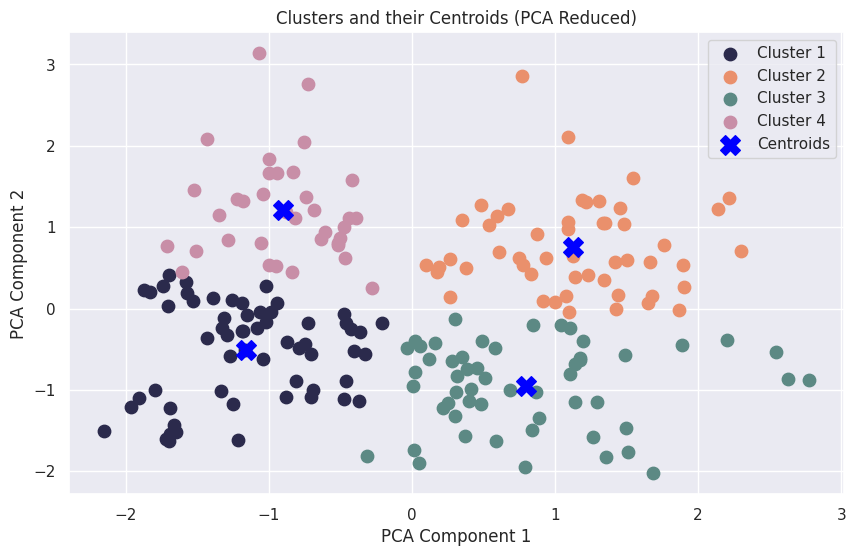

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(x_2D[y == 0, 0], x_2D[y == 0, 1], s=80, c='#2B2A4C', label='Cluster 1')
plt.scatter(x_2D[y == 1, 0], x_2D[y == 1, 1], s=80, c='#EA906C', label='Cluster 2')
plt.scatter(x_2D[y == 2, 0], x_2D[y == 2, 1], s=80, c='#5C8984', label='Cluster 3')
plt.scatter(x_2D[y == 3, 0], x_2D[y == 3, 1], s=80, c='#C88EA7', label='Cluster 4')
# plt.scatter(x_2D[y == 4, 0], x_2D[y == 4, 1], s=80, c='#FFD966', label='Cluster 5')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],s=200, c='blue', marker='X', label='Centroids')

plt.title('Clusters and their Centroids (PCA Reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(True)
plt.show()

## <div style="font-family: 'Playfair Display', serif; font-weight:bold; letter-spacing: 0px; color:#1A132F; font-size:120%; text-align:center; padding:10px; background: #C6DCE4; border-radius: 25px; box-shadow: 10px 10px 5px #748DA6;" > 5.2 Clustring anual income & spending score</div>  

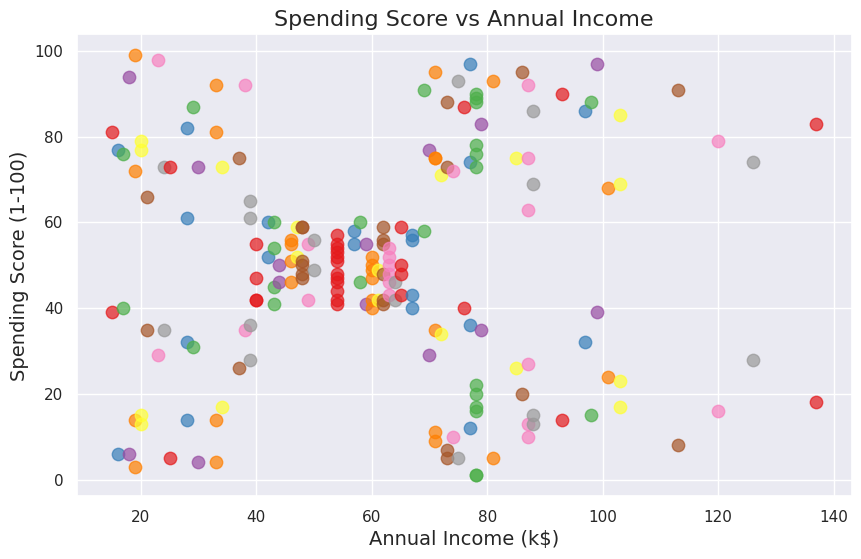

In [24]:
plt.figure(figsize=(10, 6))

palette = sns.color_palette('Set1', n_colors=len(data['Annual Income (k$)'].unique()))

for i, income in enumerate(data['Annual Income (k$)'].unique()):
    filt = data[data['Annual Income (k$)'] == income]
    plt.scatter([income] * len(filt), filt['Spending Score (1-100)'],label=f'Income: {income}k$', alpha=0.7, s=80, c=[palette[i]])
    plt.xlabel('Annual Income (k$)', fontsize=14)
    plt.ylabel('Spending Score (1-100)', fontsize=14)
    plt.title('Spending Score vs Annual Income', fontsize=16)

In [25]:
x_2D=data.iloc[:,[2,3]]
x_2D=sc.fit_transform(x_2D)

In [26]:
silhouette_scores = []
wcss=[]
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(x_2D)
  wcss.append(kmeans.inertia_)
  if i > 1:
        score = silhouette_score(x_2D, kmeans.labels_)
        silhouette_scores.append(score)


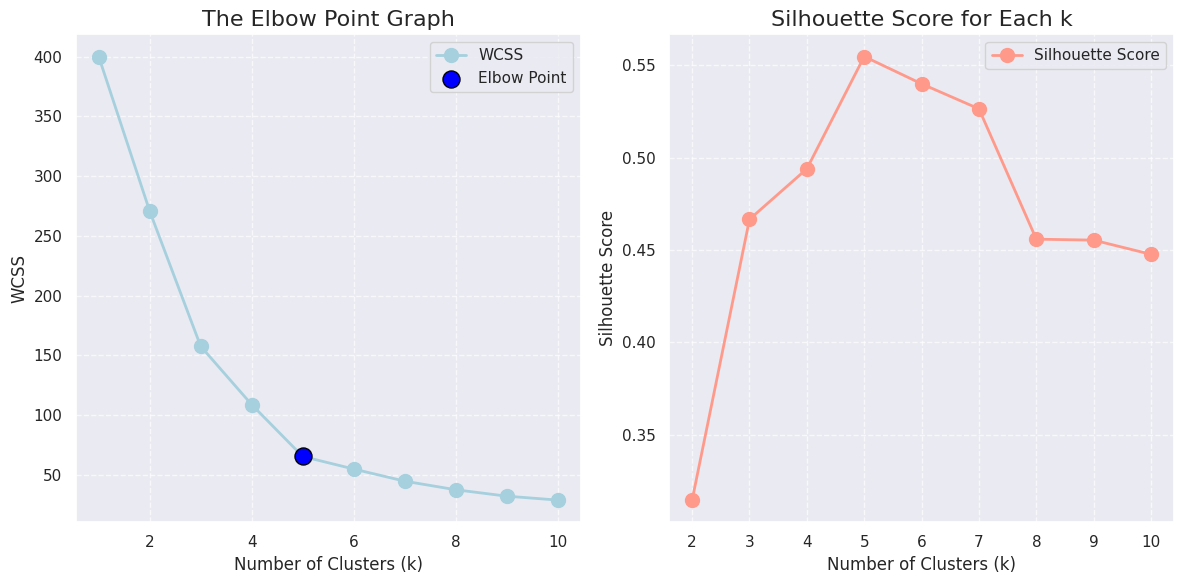

In [27]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='#A6D0DD',
         markersize=10, linewidth=2, label='WCSS')
plt.title('The Elbow Point Graph', fontsize=16)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('WCSS', fontsize=12)

elbow_point = 5

plt.scatter(elbow_point, wcss[elbow_point-1], color='blue', s=150, zorder=5, edgecolor='black', label='Elbow Point')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='-', color='#FF9A8B',
         markersize=10, linewidth=2, label='Silhouette Score')
plt.title('Silhouette Score for Each k', fontsize=16)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

plt.tight_layout()
plt.show()

In [28]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=42)
y=kmeans.fit_predict(x_2D)

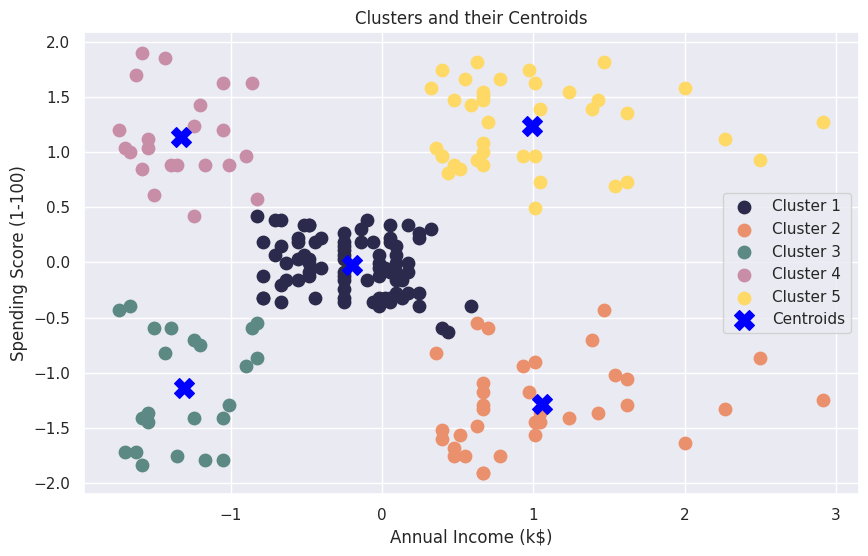

In [29]:
plt.figure(figsize=(10, 6))
plt.scatter(x_2D[y == 0, 0], x_2D[y == 0, 1], s=80, c='#2B2A4C', label='Cluster 1')
plt.scatter(x_2D[y == 1, 0], x_2D[y == 1, 1], s=80, c='#EA906C', label='Cluster 2')
plt.scatter(x_2D[y == 2, 0], x_2D[y == 2, 1], s=80, c='#5C8984', label='Cluster 3')
plt.scatter(x_2D[y == 3, 0], x_2D[y == 3, 1], s=80, c='#C88EA7', label='Cluster 4')
plt.scatter(x_2D[y == 4, 0], x_2D[y == 4, 1], s=80, c='#FFD966', label='Cluster 5')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='blue', marker='X', label='Centroids')

plt.title('Clusters and their Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()

In [30]:
silhouette_avg = silhouette_score(x_2D, y)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.5546571631111091


##  <div style="font-family: 'Playfair Display', serif; font-weight:bold; letter-spacing: 0px; color:#1A132F; font-size:120%; text-align:center; padding:10px; background: #C6DCE4; border-radius: 25px; box-shadow: 10px 10px 5px #748DA6;" > 5.3 Clustering anual income & age</div>  

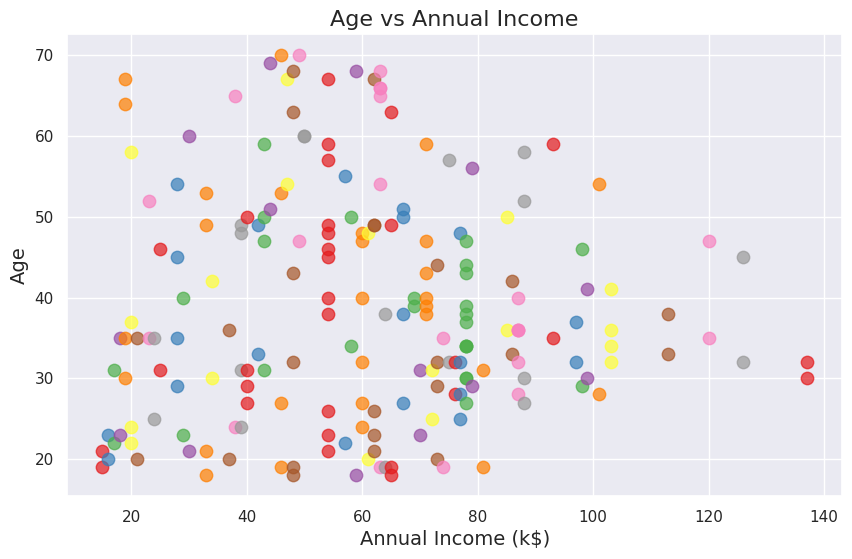

In [31]:
plt.figure(figsize=(10, 6))

palette = sns.color_palette('Set1', n_colors=len(data['Annual Income (k$)'].unique()))

for i, income in enumerate(data['Annual Income (k$)'].unique()):
    filt = data[data['Annual Income (k$)'] == income]
    plt.scatter([income] * len(filt), filt['Age'],label=f'Income: {income}k$', alpha=0.7, s=80, c=[palette[i]])
    plt.xlabel('Annual Income (k$)', fontsize=14)
    plt.ylabel('Age', fontsize=14)
    plt.title('Age vs Annual Income', fontsize=16)

In [32]:
x_2D=data.iloc[:,[1,2]]
x_2D=sc.fit_transform(x_2D)

In [33]:
silhouette_scores = []
wcss=[]
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(x_2D)
  wcss.append(kmeans.inertia_)
  if i > 1:
        score = silhouette_score(x_2D, kmeans.labels_)
        silhouette_scores.append(score)


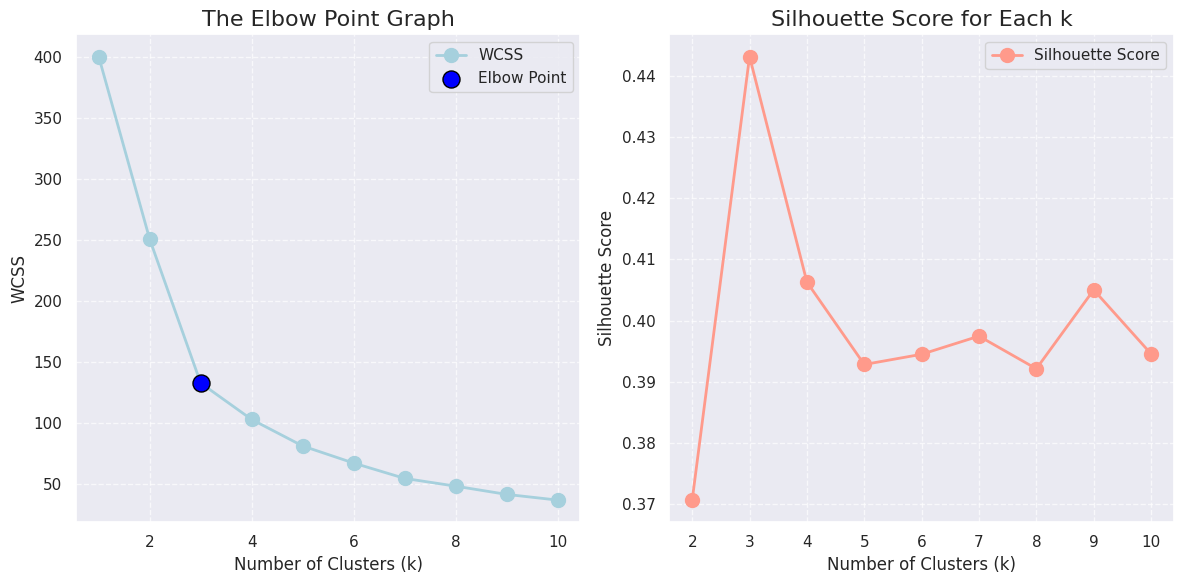

In [34]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='#A6D0DD',
         markersize=10, linewidth=2, label='WCSS')
plt.title('The Elbow Point Graph', fontsize=16)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('WCSS', fontsize=12)

elbow_point = 3

plt.scatter(elbow_point, wcss[elbow_point-1], color='blue', s=150, zorder=5, edgecolor='black', label='Elbow Point')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='-', color='#FF9A8B',
         markersize=10, linewidth=2, label='Silhouette Score')
plt.title('Silhouette Score for Each k', fontsize=16)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

plt.tight_layout()
plt.show()

In [35]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=42)
y=kmeans.fit_predict(x_2D)

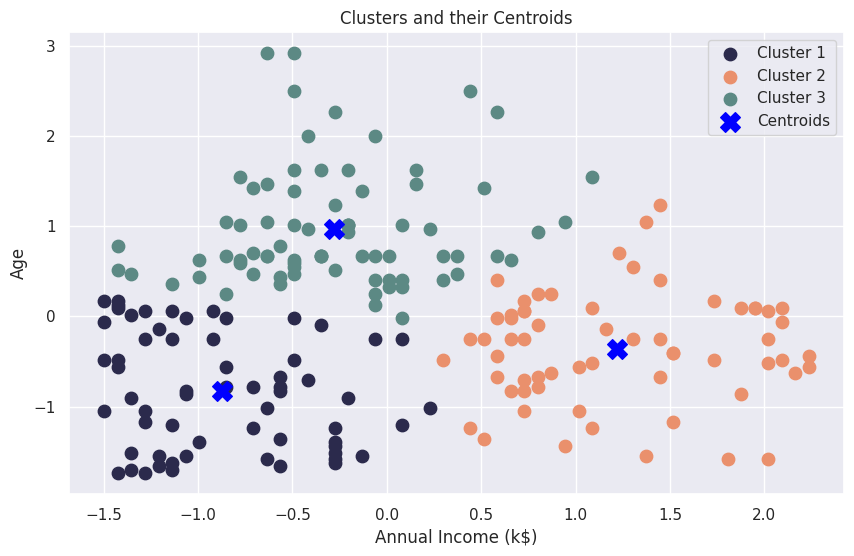

In [36]:
plt.figure(figsize=(10, 6))
plt.scatter(x_2D[y == 0, 0], x_2D[y == 0, 1], s=80, c='#2B2A4C', label='Cluster 1')
plt.scatter(x_2D[y == 1, 0], x_2D[y == 1, 1], s=80, c='#EA906C', label='Cluster 2')
plt.scatter(x_2D[y == 2, 0], x_2D[y == 2, 1], s=80, c='#5C8984', label='Cluster 3')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='blue', marker='X', label='Centroids')

plt.title('Clusters and their Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Age')
plt.legend()
plt.grid(True)
plt.show()

## <div style="font-family: 'Playfair Display', serif; font-weight:bold; letter-spacing: 0px; color:#1A132F; font-size:120%; text-align:center; padding:10px; background: #C6DCE4; border-radius: 25px; box-shadow: 10px 10px 5px #748DA6;" > 5.4 Clustering age and spending score</div>  

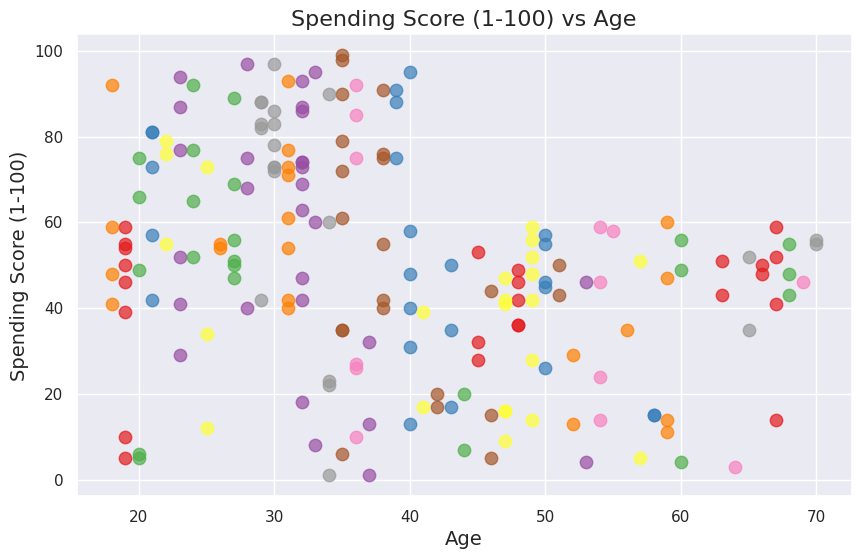

In [37]:
plt.figure(figsize=(10, 6))

palette = sns.color_palette('Set1', n_colors=len(data['Age'].unique()))

for i, income in enumerate(data['Age'].unique()):
    filt = data[data['Age'] == income]
    plt.scatter([income] * len(filt), filt['Spending Score (1-100)'],label=f'Income: {income}k$', alpha=0.7, s=80, c=[palette[i]])
    plt.xlabel('Age', fontsize=14)
    plt.ylabel('Spending Score (1-100)', fontsize=14)
    plt.title('Spending Score (1-100) vs Age', fontsize=16)

In [38]:
x_2D=data.iloc[:,[1,3]]
x_2D=sc.fit_transform(x_2D)

In [39]:
silhouette_scores = []
wcss=[]
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(x_2D)
  wcss.append(kmeans.inertia_)
  if i > 1:
        score = silhouette_score(x_2D, kmeans.labels_)
        silhouette_scores.append(score)


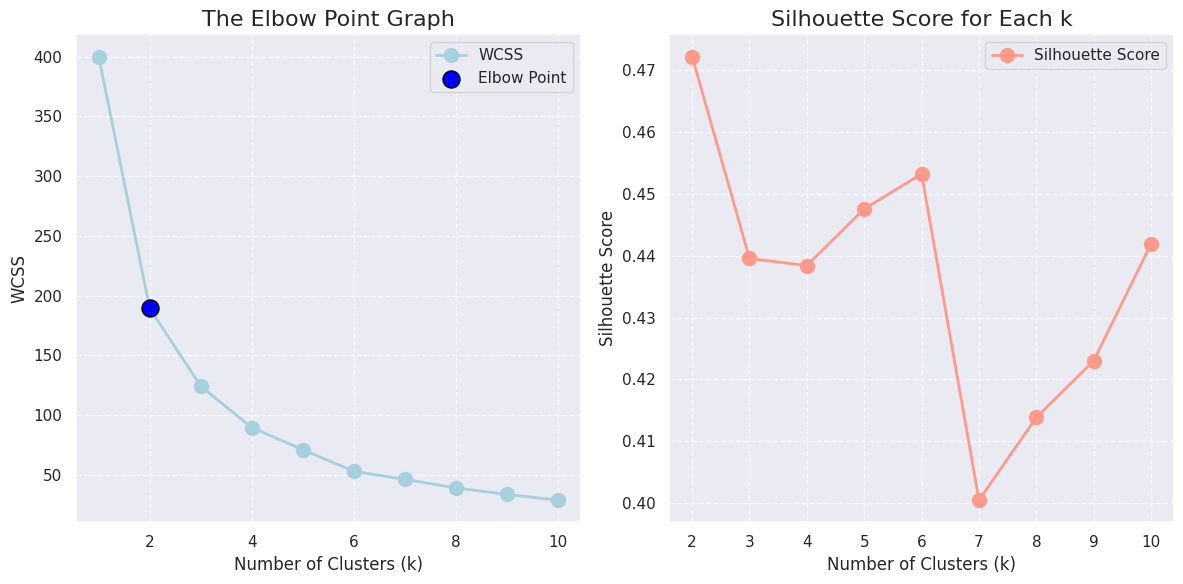

In [40]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='#A6D0DD',
         markersize=10, linewidth=2, label='WCSS')
plt.title('The Elbow Point Graph', fontsize=16)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('WCSS', fontsize=12)

elbow_point = 2

plt.scatter(elbow_point, wcss[elbow_point-1], color='blue', s=150, zorder=5, edgecolor='black', label='Elbow Point')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='-', color='#FF9A8B',
         markersize=10, linewidth=2, label='Silhouette Score')
plt.title('Silhouette Score for Each k', fontsize=16)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

plt.tight_layout()
plt.show()

In [41]:
kmeans=KMeans(n_clusters=2,init='k-means++',random_state=42)
y=kmeans.fit_predict(x_2D)

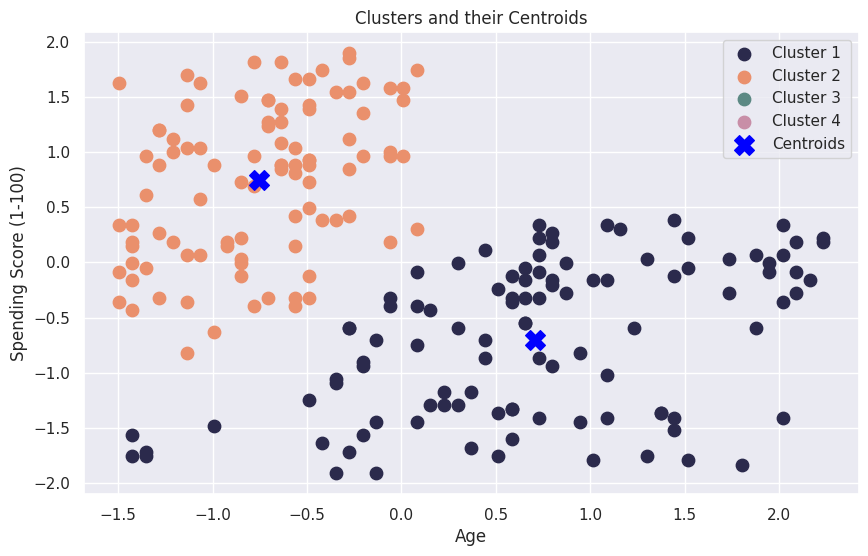

In [42]:
plt.figure(figsize=(10, 6))
plt.scatter(x_2D[y == 0, 0], x_2D[y == 0, 1], s=80, c='#2B2A4C', label='Cluster 1')
plt.scatter(x_2D[y == 1, 0], x_2D[y == 1, 1], s=80, c='#EA906C', label='Cluster 2')
plt.scatter(x_2D[y == 2, 0], x_2D[y == 2, 1], s=80, c='#5C8984', label='Cluster 3')
plt.scatter(x_2D[y == 3, 0], x_2D[y == 3, 1], s=80, c='#C88EA7', label='Cluster 4')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='blue', marker='X', label='Centroids')

plt.title('Clusters and their Centroids')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()

# <div style="font-family: 'Playfair Display', serif; font-weight:bold; letter-spacing: 0px; color:#1A132F; font-size:120%; text-align:center; padding:10px; background: #CDDCEC; border-radius: 0px; box-shadow: 10px 10px 5px #748DAB;" > Hierarchical Clustering - Agglomerative </div>  

## <div style="font-family: 'Playfair Display', serif; font-weight:bold; letter-spacing: 0px; color:#1A132F; font-size:120%; text-align:center; padding:10px; background: #C6DCE4; border-radius: 25px; box-shadow: 10px 10px 5px #748DA6;" > 6.1 Clustering 4 components</div>  

In [43]:
sc=StandardScaler()
x_sc=sc.fit_transform(data)

In [44]:
pca=PCA(n_components=2)
x_pca=pca.fit_transform(x_sc)

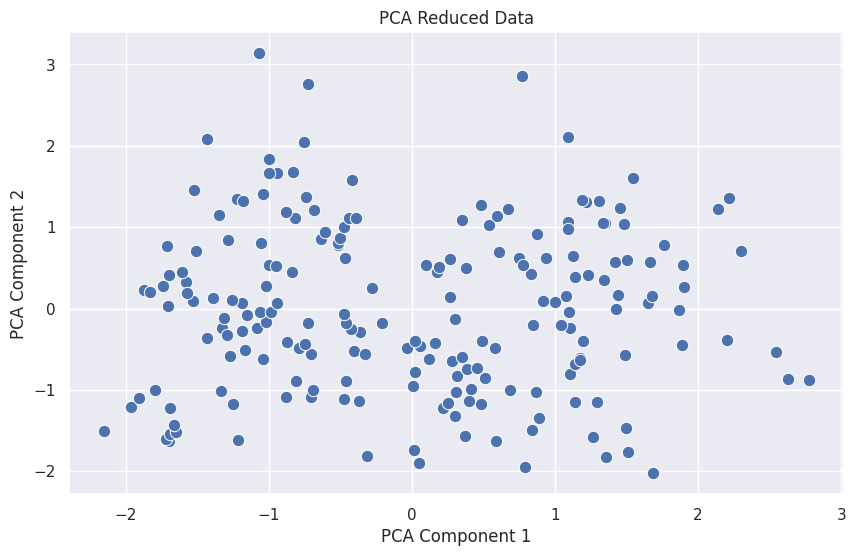

In [45]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x_pca[:, 0], y=x_pca[:, 1], s=80)
plt.title('PCA Reduced Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()

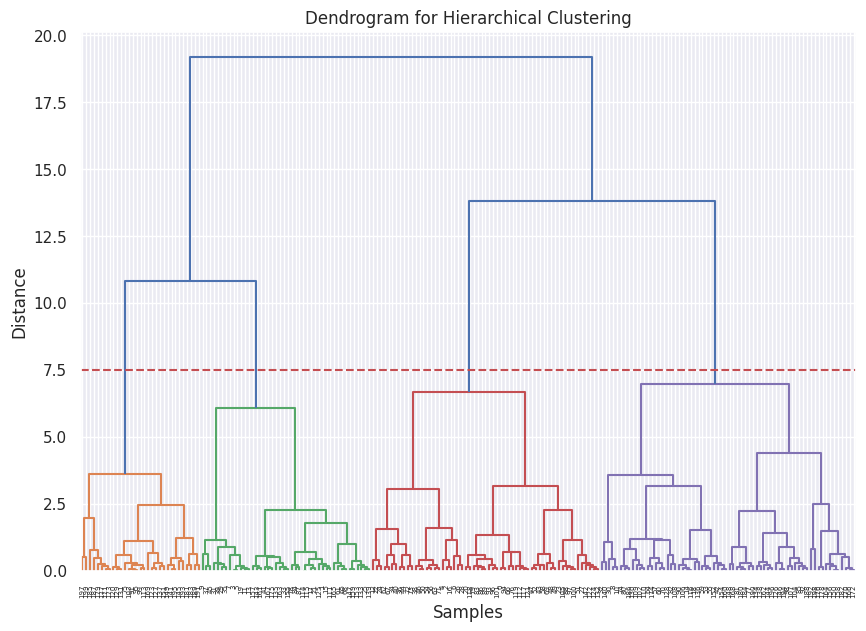

In [46]:
from scipy.cluster.hierarchy import linkage, dendrogram

linkage_matrix = linkage(x_pca, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix,color_threshold=7.5)
plt.axhline(y=7.5, color='r', linestyle='--')  # Horizontal line to cut the dendrogram
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

In [47]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(x_pca)

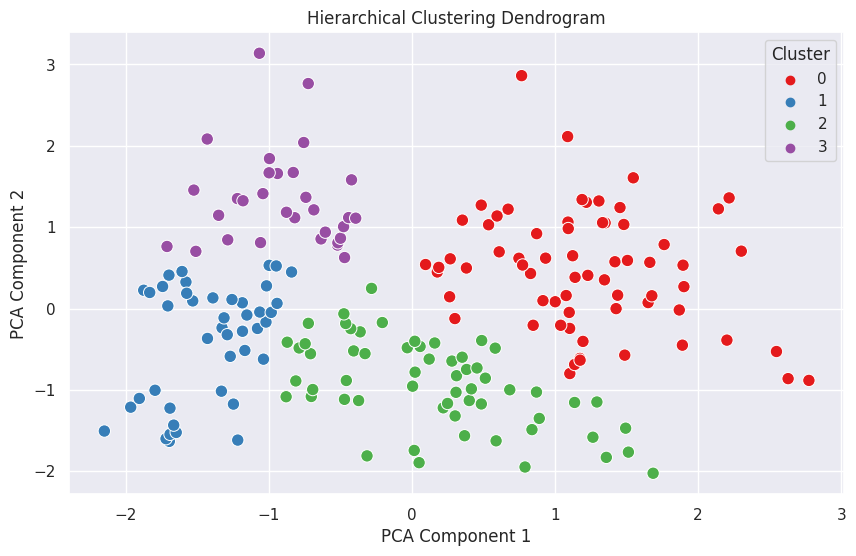

In [48]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x_pca[:, 0], y=x_pca[:, 1], hue=y_hc, palette='Set1', s=80)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

## <div style="font-family: 'Playfair Display', serif; font-weight:bold; letter-spacing: 0px; color:#1A132F; font-size:120%; text-align:center; padding:10px; background: #C6DCE4; border-radius: 25px; box-shadow: 10px 10px 5px #748DA6;" > 6.2 Clustering anual income & spending score</div>  

In [49]:
x_2d=data.iloc[:,[2,3]]
x_2d=sc.fit_transform(x_2d)

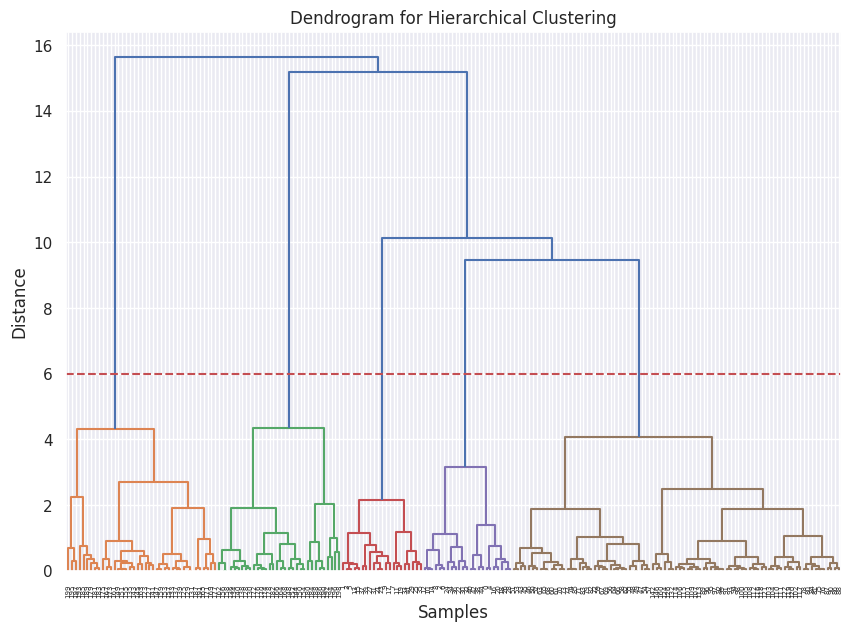

In [50]:
linkage_matrix = linkage(x_2d, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix,color_threshold=6)
plt.axhline(y=6, color='r', linestyle='--')  # Horizontal line to cut the dendrogram
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

In [51]:
hc=AgglomerativeClustering(n_clusters=5,metric='euclidean',linkage='ward')
y_hc=hc.fit_predict(x_2d)

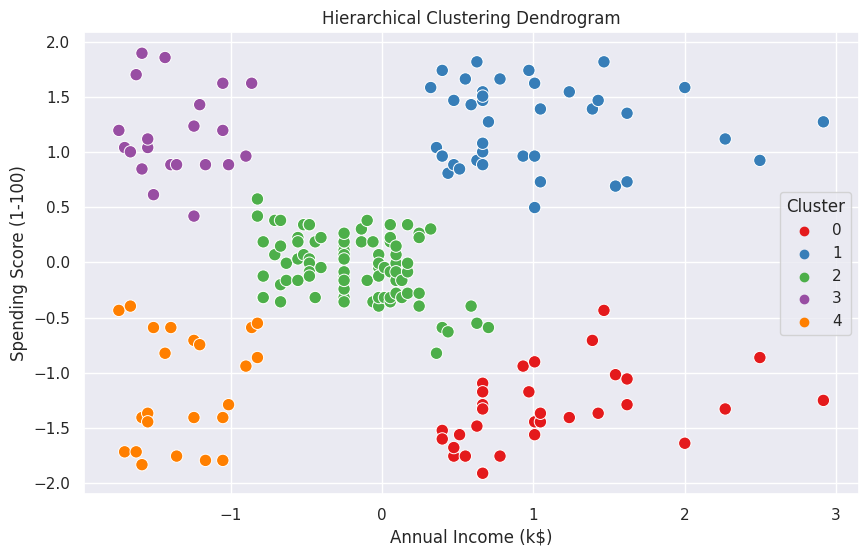

In [52]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x_2d[:, 0], y=x_2d[:, 1], hue=y_hc, palette='Set1', s=80)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [53]:
silhouette_avg = silhouette_score(x_2d, y_hc)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.5538089226688662


# <div style="font-family: 'Playfair Display', serif; font-weight:bold; letter-spacing: 0px; color:#1A132F; font-size:120%; text-align:center; padding:10px; background: #CDDCEC; border-radius: 0px; box-shadow: 10px 10px 5px #748DAB;" > DBSCAN </div>  

## <div style="font-family: 'Playfair Display', serif; font-weight:bold; letter-spacing: 0px; color:#1A132F; font-size:120%; text-align:center; padding:10px; background: #C6DCE4; border-radius: 25px; box-shadow: 10px 10px 5px #748DA6;" > 7.1 Clustering anual income & spending score</div>  

https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/

In [54]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=0.34,min_samples=5)
y_dbscan=dbscan.fit(x_2d)

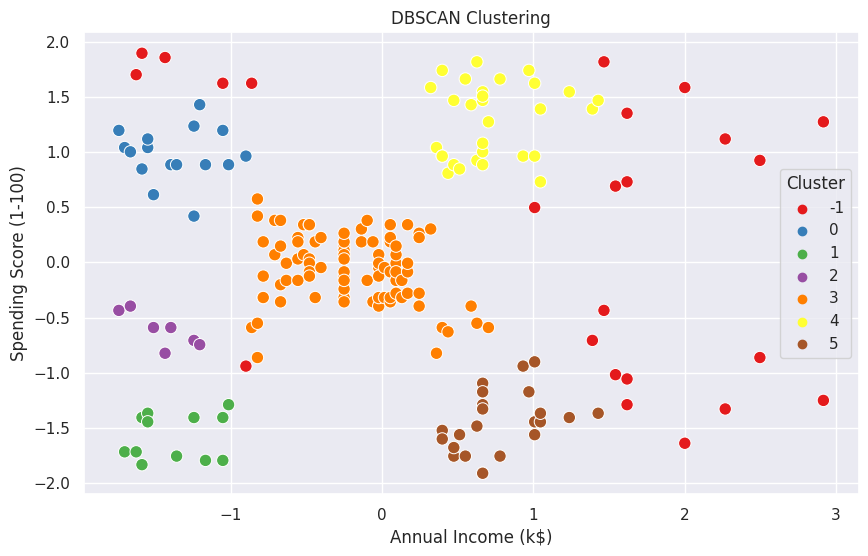

In [55]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x_2d[:, 0], y=x_2d[:, 1], hue=y_dbscan.labels_, palette='Set1', s=80)
plt.title('DBSCAN Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [56]:
silhouette_avg = silhouette_score(x_2d, y_dbscan.labels_)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.4328513388873844


# <div style="font-family: 'Playfair Display', serif; font-weight:bold; letter-spacing: 0px; color:#1A132F; font-size:120%; text-align:center; padding:10px; background: #C6DCE4; border-radius: 25px; box-shadow: 10px 10px 5px #748DA6;" > 8. The best clustering</div>  

 <div style="font-family: 'Playfair Display', serif; font-weight:bold; letter-spacing: 0px; color:#1A132F; font-size:120%; padding:10px; background: #408E91; border-radius: 6px;" >We can notice from above that the best best clustering is clustering by k-means according to anual income & spending score
    </div>  

In [57]:
x_2D=data.iloc[:,[2,3]]
x_2D=sc.fit_transform(x_2D)

kmeans=KMeans(n_clusters=5,init='k-means++',random_state=42)
y=kmeans.fit_predict(x_2D)
y

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

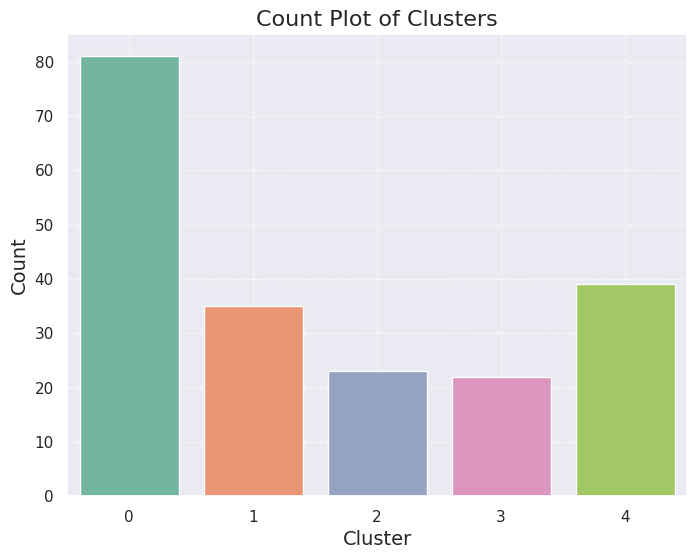

In [58]:
cluster_labels = pd.Series(y, name='Cluster')

plt.figure(figsize=(8, 6))
sns.countplot(x=cluster_labels, palette='Set2')
plt.title('Count Plot of Clusters', fontsize=16)
plt.xlabel('Cluster', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()